In [1]:
import os
from pathlib import Path

import numpy as np
import optuna
import pandas as pd
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch_geometric.transforms import AddSelfLoops
from mscproject.transforms import RemoveSelfLoops


from mscproject.datasets import CompanyBeneficialOwners
from mscproject.transforms import RemoveSelfLoops
import mscproject.models as mod
import mscproject.experiment as exp

while not Path("data") in Path(".").iterdir():
    os.chdir("..")

In [3]:
MODEL_DIR = Path("data/models/pyg/weights-unregularised/")
OPTUNA_DB = Path("data/optuna-06.db")
DATASET_PATH = Path("data/pyg")
PREDICTION_DIR = Path("data/predictions")

model_names = [x.stem for x in MODEL_DIR.glob("*.pt")]
model_names

['GraphSAGE', 'KGNN']

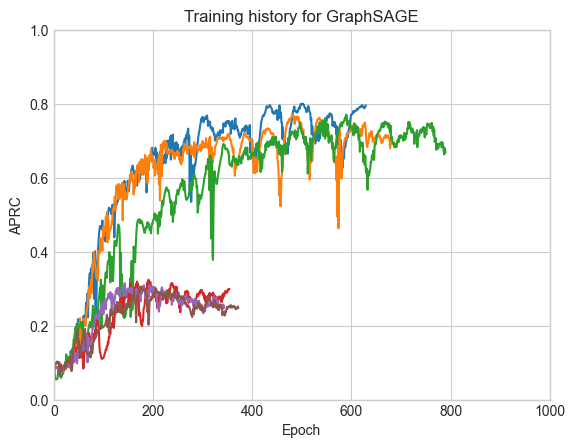

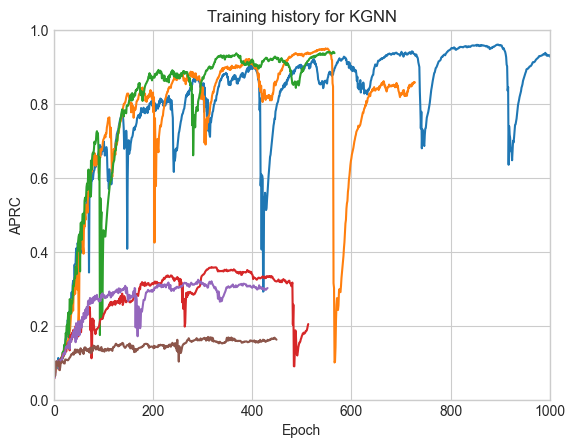

In [94]:
for model_name in model_names:
    study = optuna.load_study(
        study_name=f"pyg_model_selection_{model_name}_WEIGHTS",
        storage=f"sqlite:///{OPTUNA_DB}",
    )
    top = study.trials_dataframe().sort_values("value").tail(3)
    bottom = study.trials_dataframe().sort_values("value").head(3)
    sample = pd.concat([top, bottom]).sort_values("value", ascending=False)

    # Set matplotlib style
    plt.style.use("seaborn-whitegrid")

    plt.rcParams["axes.prop_cycle"] = plt.cycler(
        color=plt.cm.tab10(np.linspace(0, 1, 10))
    )

    if model_name == "KGNN":
        model_name = "kGNN"

    plt.title(f"Training history for {model_name}")
    plt.xlabel("Epoch")
    plt.ylabel("APRC")
    plt.xlim(0, 1000)
    plt.ylim(0, 1)

    for idx, (i, trial) in enumerate(sample.iterrows()):
        plt.plot(trial["user_attrs_aprc_history"])

    plt.show()
    